<a href="https://colab.research.google.com/github/shiffa-04/FraudDetectionModel/blob/main/CreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
import pandas as pd
df = pd.read_csv("creditcard.csv")
profile = ProfileReport(df, title = 'credit Card')
profile.to_file("credit_card_report.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, make_scorer

np.random.seed(20)

In [ ]:
df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df = df.drop_duplicates()
df.shape

(283726, 31)

In [ ]:
df.isnull().values.any()

False

In [ ]:
classes = df['Class'].value_counts()
classes

Class
0    283253
1       473
Name: count, dtype: int64

In [ ]:
normal_share = round(classes[0] / df['Class'].count() * 100, 2)
print(normal_share)
fraud_share = round(classes[1] / df['Class'].count() * 100, 2)
print(fraud_share)

99.83
0.17


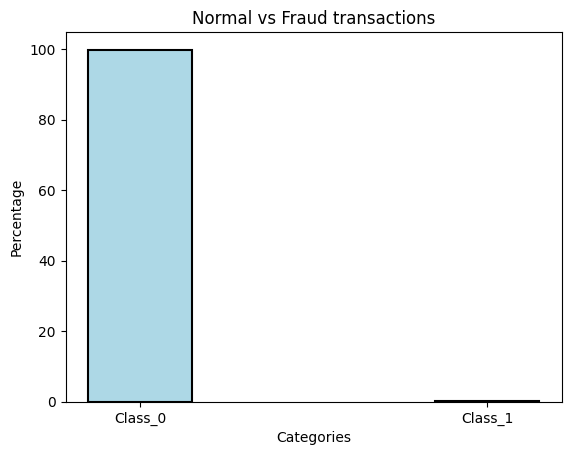

In [ ]:
categories = ['Class_0', 'Class_1']
values = [normal_share, fraud_share]

# Create a bar graph
plt.bar(categories, values, color='lightblue', edgecolor='black', linewidth=1.5, width= 0.3)

# Add a title and labels
plt.title('Normal vs Fraud transactions')
plt.xlabel('Categories')
plt.ylabel('Percentage')

# Show the plot
plt.show()

In [ ]:
df = df.drop("Time", axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
X = df.drop("Class", axis = 1)
y = df["Class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42, stratify=y)


In [ ]:
scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['Amount'] = scaler.transform(X_test['Amount'].values.reshape(-1,1))
X_train.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
141136,-1.044205,0.740011,2.306937,0.907613,0.027661,0.179490,1.025657,0.061306,-1.021018,-0.559311,...,0.153015,0.059660,0.169119,-0.069211,0.482584,0.404669,0.926844,-0.054724,0.057958,0.042450
122274,-0.248581,1.023212,0.682132,-0.256061,0.612624,-0.190075,0.648512,0.062324,-0.173059,-0.490180,...,0.115595,-0.362686,-1.016706,-0.165306,-1.092089,-0.000513,0.161351,0.236464,0.082568,-0.318377
232853,-0.339354,-0.220946,0.492522,-1.349625,1.729014,4.546223,-0.976430,0.401171,0.307461,-0.825431,...,0.076178,0.745086,-0.642464,-0.367894,0.716794,1.308926,0.432973,0.061183,0.153253,0.078958
195019,2.048093,-0.188729,-2.214200,0.015796,1.009157,0.036530,0.381669,-0.156977,0.132303,0.238919,...,-0.076153,-0.025638,0.006832,-0.056670,-0.287859,0.285836,0.571429,-0.108998,-0.083828,-0.184089
173507,2.061133,-0.013102,-1.050434,0.413807,-0.101555,-1.206329,0.221449,-0.365785,0.460734,0.057518,...,-0.189804,-0.282303,-0.654364,0.334538,0.060824,-0.281846,0.193558,-0.067353,-0.058626,-0.345146


In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
mlp = MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)


In [ ]:
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant'],
}

In [ ]:
grid_search = GridSearchCV(mlp, param_grid, scoring='average_precision', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)

# Evaluate the classification
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5666
           1       1.00      0.89      0.94         9

    accuracy                           1.00      5675
   macro avg       1.00      0.94      0.97      5675
weighted avg       1.00      1.00      1.00      5675



In [ ]:
precision, recall, _ = precision_recall_curve(y_test, best_mlp.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

Precision-Recall AUC: 0.9497685185185185
